# ***QUESTION 1***

*To use given [dataset](https://docs.google.com/spreadsheets/d/1LhjkG7oaNPEBasbfgjFeTs5Sni1pNEID/edit?usp=share_link&ouid=102002268439115048538&rtpof=true&sd=true) to predict the values of Y.*

---



### ***1. Preprocess the data. Split it using a 70:10:20 ratio, which represents training:validation:testing.***

In [83]:
import pandas as pd
import numpy as np

# Importing dataset from Google Drive
data1 = pd.read_excel("/content/drive/MyDrive/PRML/Lab 2/ENB2012_data.xlsx")
data1_np = pd.DataFrame.to_numpy(data1)

columns = data1.columns.values.tolist()

In [84]:
data1

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84
...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48


Preprocessing and visualising data.

In [85]:
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB
None


In [86]:
corr_matrix=data1.corr()

print(corr_matrix['Y1'])

X1    0.622272
X2   -0.658120
X3    0.455671
X4   -0.861828
X5    0.889430
X6   -0.002587
X7    0.269842
X8    0.087368
Y1    1.000000
Name: Y1, dtype: float64


In [87]:
from sklearn.model_selection import train_test_split

X = data1.drop('Y1', axis=1)
y = data1['Y1']

def split(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=1) 

    return (X_train, X_val, X_test, y_train, y_val, y_test)

In [88]:
split_tup = split(X, y)
X_train, X_val, X_test, y_train, y_val, y_test = split_tup[0], split_tup[1], split_tup[2], split_tup[3], split_tup[4], split_tup[5], 

### ***2. Write a function to train the data using a regression decision tree. The function varies hyper-parameters to find the tree that generalizes best (based on its performance on the validation set). So, you need to train on the 70% training data and check performance on the 10% validation data.***

In [89]:
from sklearn.tree import DecisionTreeRegressor as DTR
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

Depth...


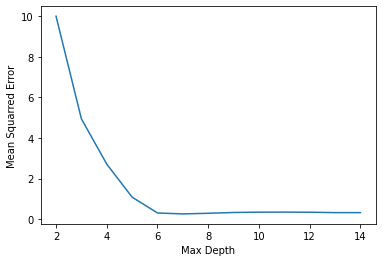

MSE is minimum at depth equals to 7 when checked individually.


In [90]:
depth_dic = {}
for i in range(2,15):
    regressor = DTR(max_depth=i, random_state=True)
    regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_val)

    depth_dic[i] = metrics.mean_squared_error(y_val, y_pred)

print("Depth...")

x = list(depth_dic.keys())
y = list(depth_dic.values())
plt.ylabel("Mean Squarred Error")
plt.xlabel("Max Depth")

plt.plot(x, y)
plt.show()

print("MSE is minimum at depth equals to", min(depth_dic, key=depth_dic.get), "when checked individually.")

Minimum Sample Split...


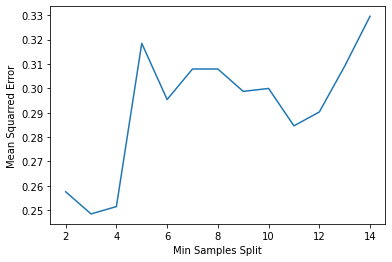

MSE is minimum at minimum sample split equals to 3 when checked individually with depth=7.


In [91]:
mss_dic = {}
for i in range(2,15):
    regressor = DTR(max_depth=7, min_samples_split=i, random_state=True)
    regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_val)

    mss_dic[i] = metrics.mean_squared_error(y_val, y_pred)

print("Minimum Sample Split...")

x = list(mss_dic.keys())
y = list(mss_dic.values())
plt.ylabel("Mean Squarred Error")
plt.xlabel("Min Samples Split")

plt.plot(x, y)
plt.show()

print("MSE is minimum at minimum sample split equals to", min(mss_dic, key=mss_dic.get), "when checked individually with depth=7.")

Maximum Leaf Nodes...


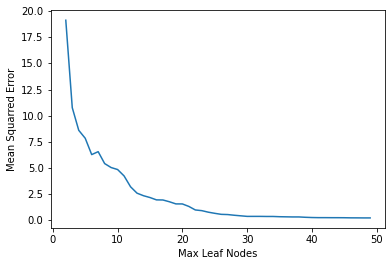

MSE is minimum at max leaf nodes equals to 48 when checked individually with depth=7 and min sample split=3.


In [92]:
mln_dic = {}
for i in range(2,50):
    regressor = DTR(max_depth=7, min_samples_split=3, max_leaf_nodes=i, random_state=True)
    regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_val)

    mln_dic[i] = metrics.mean_squared_error(y_val, y_pred)

print("Maximum Leaf Nodes...")

x = list(mln_dic.keys())
y = list(mln_dic.values())
plt.ylabel("Mean Squarred Error")
plt.xlabel("Max Leaf Nodes")

plt.plot(x, y)
plt.show()

print("MSE is minimum at max leaf nodes equals to", min(mln_dic, key=mln_dic.get), "when checked individually with depth=7 and min sample split=3.")

Minimum Impurity Decrease...


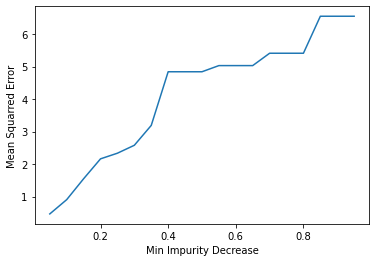

MSE is minimum at min impurity decrease equals to 0.05 when checked individually with depth=7, min sample split=3 and max leaf nodes=48.


In [93]:
mid_dic = {}
for i in range(1,20):
    regressor = DTR(max_depth=7, min_samples_split=3, max_leaf_nodes=48, min_impurity_decrease=i/20, random_state=True)
    regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_val)

    mid_dic[i/20] = metrics.mean_squared_error(y_val, y_pred)

print("Minimum Impurity Decrease...")

x = list(mid_dic.keys())
y = list(mid_dic.values())
plt.ylabel("Mean Squarred Error")
plt.xlabel("Min Impurity Decrease")

plt.plot(x, y)
plt.show()

print("MSE is minimum at min impurity decrease equals to", min(mid_dic, key=mid_dic.get), "when checked individually with depth=7, min sample split=3 and max leaf nodes=48.")

Criterion...


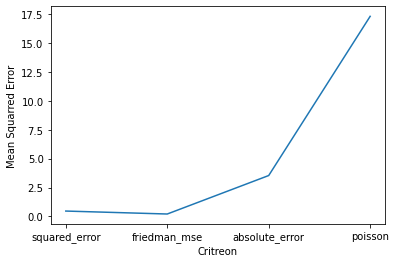

MSE is minimum when creterion is friedman_mse when checked individually with depth=7, min sample split=3, max leaf nodes=48 and min impurity decrease=0.05.


In [94]:
criteria = ["squared_error", "friedman_mse", "absolute_error", "poisson"]

crt_dic = {}
for i in criteria:
    regressor = DTR(criterion=i, max_depth=7, min_samples_split=3, max_leaf_nodes=48, min_impurity_decrease=0.05, random_state=True)
    regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_val)

    crt_dic[i] = metrics.mean_squared_error(y_val, y_pred)

print("Criterion...")

x = list(crt_dic.keys())
y = list(crt_dic.values())
plt.ylabel("Mean Squarred Error")
plt.xlabel("Critreon")

plt.plot(x, y)
plt.show()

print("MSE is minimum when creterion is", min(crt_dic, key=crt_dic.get), "when checked individually with depth=7, min sample split=3, max leaf nodes=48 and min impurity decrease=0.05.")

In [95]:
def best_tree(X_train, y_train, X_val, y_val):
    tree = None
    criteria = ["squared_error", "friedman_mse", "absolute_error", "poisson"]
    hp_best = {}

    min = 32767

    for depth in range(2,10):
        for mss in range (2, 10):
            for mln in range(2, 50):
                for mid in range(1, 20, 20):
                    for crt in criteria:
                        regressor = DTR(criterion=crt, max_depth=depth, min_samples_split=mss, max_leaf_nodes=mln, min_impurity_decrease=mid/20, random_state=True)
                        regressor.fit(X_train, y_train)

                        y_pred = regressor.predict(X_val)

                        error = metrics.mean_squared_error(y_val, y_pred)

                        if error<min:
                            min = error
                            tree = regressor
                            hp_best['depth'] = depth
                            hp_best['mss'] = mss
                            hp_best['mln'] = mln
                            hp_best['mid'] = mid
                            hp_best['crt'] = crt

    print("Hyperparameters:")
    print("Depth :", hp_best['depth'])
    print("Min Samples Split :", hp_best['mss'])
    print("Max Leaf Nodes :", hp_best['mln'])
    print("Min Impurity Decrease:", hp_best['mid'])
    print("Criterion :", hp_best['crt'])

    print("Min error on validation Set :", min)

    return tree


In [96]:
besttree = best_tree(X_train, y_train, X_val, y_val)

Hyperparameters:
Depth : 7
Min Samples Split : 2
Max Leaf Nodes : 48
Min Impurity Decrease: 1
Criterion : friedman_mse
Min error on validation Set : 0.21201088371071783


### ***3. Perform Hold-out cross validation, 5-fold cross-validation and repeated-5-fold validation using the optimal hyper-parameters decided in the previous question. Finally, calculate the mean squared error between the predicted and the ground-truth values in the test data for your best model. Also, plot the decision tree created.***

In [97]:
regressor = besttree    # tree with optimal hyper parameters

y_pred = regressor.predict(X_test)
hold_error = metrics.mean_squared_error(y_test, y_pred)

hold_error

0.28910029955217775

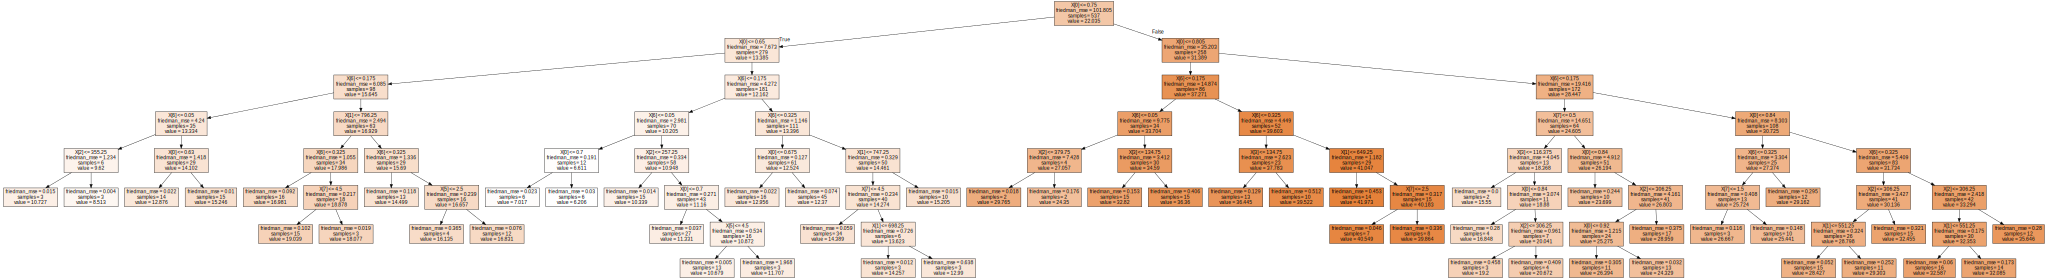

In [98]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(besttree, out_file=None,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

# ***QUESTION 2***

---




## ***CLASSIFICATION***

*Using the IRIS Dataset (petal width and petal length attributes only).*

---



In [1]:
# importing required modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as split
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn import tree

In [2]:
# importing iris dataset from google drive
data = pd.read_csv("drive/MyDrive/PRML/Lab 2/iris/iris.data")
print(data)
data = pd.DataFrame.to_numpy(data)  # converting data to numpy framework

# extracting required attributes (petal width and petal length) from data
data = data[:, 2:]

# print(data)

     5.1  3.5  1.4  0.2     Iris-setosa
0    4.9  3.0  1.4  0.2     Iris-setosa
1    4.7  3.2  1.3  0.2     Iris-setosa
2    4.6  3.1  1.5  0.2     Iris-setosa
3    5.0  3.6  1.4  0.2     Iris-setosa
4    5.4  3.9  1.7  0.4     Iris-setosa
..   ...  ...  ...  ...             ...
144  6.7  3.0  5.2  2.3  Iris-virginica
145  6.3  2.5  5.0  1.9  Iris-virginica
146  6.5  3.0  5.2  2.0  Iris-virginica
147  6.2  3.4  5.4  2.3  Iris-virginica
148  5.9  3.0  5.1  1.8  Iris-virginica

[149 rows x 5 columns]


In [3]:
#splitting data into train and test set in ratio 80:20
x_train, x_test, y_train, y_test = split(data[:, 0:2], data[:, 2], train_size=0.8, random_state=True)

print(len(x_test))

30


### ***1. Train a Decision Tree Classifier (max depth=2) on the pre-processed dataset. Plot the decision boundaries of the tree as well as indicate the depth at which each split was made.***

In [4]:
# creating decision tree classifier and training it
classifier = DTC(max_depth=2)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

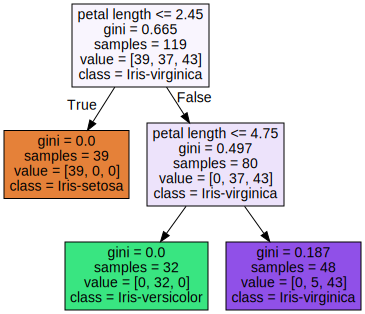

In [5]:
import graphviz
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
feature_names = ['petal length', 'petal width']
dot_data = tree.export_graphviz(classifier, out_file=None, 
                                feature_names=feature_names,  
                                class_names=classes,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [6]:
pip install -U scikit-learn --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


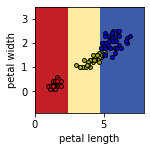

In [7]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

ax = plt.subplot(2, 3, 1)

plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
DecisionBoundaryDisplay.from_estimator(
    classifier,
    x_train,
    cmap=plt.cm.RdYlBu,
    response_method="predict",
    ax=ax,
    xlabel='petal length',
    ylabel='petal width')

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y_train == classes[i])
    plt.scatter(
        x_train[idx, 0],
        x_train[idx, 1],
        c=color,
        cmap=plt.cm.RdYlBu,
        edgecolor="black",
        s=15,
    )

### ***2. Remove the widest Iris-Versicolor from the iris training set (the one with petals 4.8 cm long and 1.8 cm wide) and train a new Decision Tree. Plot the Decision boundary for this case.***

In [8]:
for i in range(len(data)):
  if data[i][0] == 4.8 and data[i][1] == 1.8:
    np.delete(data, i, axis=0)
    break

In [9]:
#splitting data into train and test set in ratio 80:20
x_train, x_test, y_train, y_test = split(data[:, 0:2], data[:, 2], train_size=0.8, random_state=True)

print(len(x_test))

30


In [10]:
# creating decision tree classifier and training it
classifier = DTC(max_depth=2)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

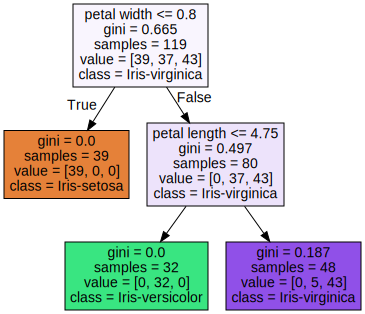

In [11]:
import graphviz
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
feature_names = ['petal length', 'petal width']
dot_data = tree.export_graphviz(classifier, out_file=None, 
                                feature_names=feature_names,  
                                class_names=classes,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

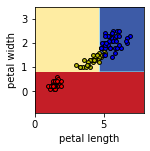

In [12]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

ax = plt.subplot(2, 3, 1)

plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
DecisionBoundaryDisplay.from_estimator(
    classifier,
    x_train,
    cmap=plt.cm.RdYlBu,
    response_method="predict",
    ax=ax,
    xlabel='petal length',
    ylabel='petal width')

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y_train == classes[i])
    plt.scatter(
        x_train[idx, 0],
        x_train[idx, 1],
        c=color,
        cmap=plt.cm.RdYlBu,
        edgecolor="black",
        s=15,
    )

### ***3. Train a Decision Tree Classifier with (max-depth = None) on the pre-processed dataset. Plot the Decision boundary for the same. Compare and analyse the results with those in part 1.***

In [13]:
# importing iris dataset from google drive
data = pd.read_csv("drive/MyDrive/PRML/Lab 2/iris/iris.data")
print(data)
data = pd.DataFrame.to_numpy(data)  # converting data to numpy framework

# extracting required attributes (petal width and petal length) from data
data = data[:, 2:]

# print(data)

     5.1  3.5  1.4  0.2     Iris-setosa
0    4.9  3.0  1.4  0.2     Iris-setosa
1    4.7  3.2  1.3  0.2     Iris-setosa
2    4.6  3.1  1.5  0.2     Iris-setosa
3    5.0  3.6  1.4  0.2     Iris-setosa
4    5.4  3.9  1.7  0.4     Iris-setosa
..   ...  ...  ...  ...             ...
144  6.7  3.0  5.2  2.3  Iris-virginica
145  6.3  2.5  5.0  1.9  Iris-virginica
146  6.5  3.0  5.2  2.0  Iris-virginica
147  6.2  3.4  5.4  2.3  Iris-virginica
148  5.9  3.0  5.1  1.8  Iris-virginica

[149 rows x 5 columns]


In [14]:
#splitting data into train and test set in ratio 80:20
x_train, x_test, y_train, y_test = split(data[:, 0:2], data[:, 2], train_size=0.80, random_state=True)

print(len(x_test))

30


In [15]:
# creating decision tree classifier and training it
classifier = DTC(max_depth=None)
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

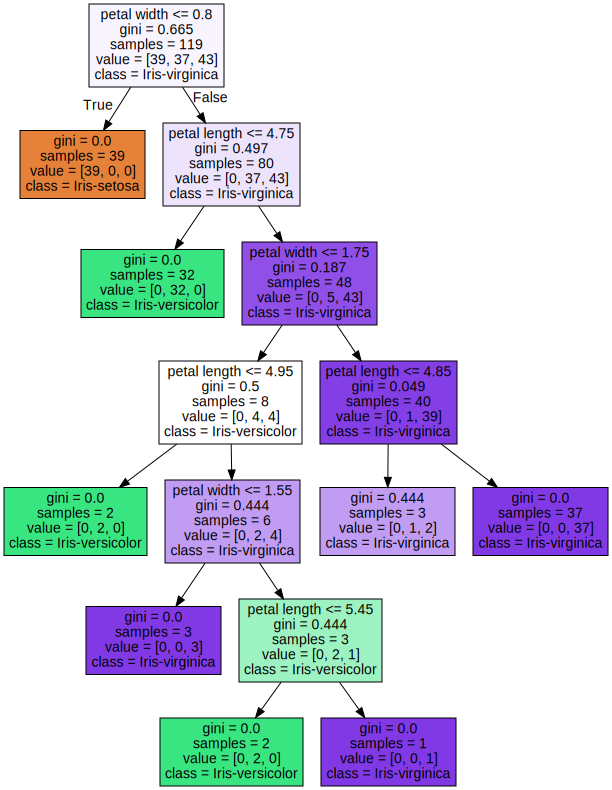

In [16]:
import graphviz
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
feature_names = ['petal length', 'petal width']
dot_data = tree.export_graphviz(classifier, out_file=None, 
                                feature_names=feature_names,  
                                class_names=classes,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

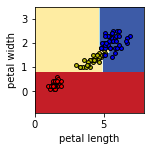

In [17]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

ax = plt.subplot(2, 3, 1)

plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
DecisionBoundaryDisplay.from_estimator(
    classifier,
    x_train,
    cmap=plt.cm.RdYlBu,
    response_method="predict",
    ax=ax,
    xlabel='petal length',
    ylabel='petal width')

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y_train == classes[i])
    plt.scatter(
        x_train[idx, 0],
        x_train[idx, 1],
        c=color,
        cmap=plt.cm.RdYlBu,
        edgecolor="black",
        s=15)

### ***4. Create a random dataset having 2 attributes(X1 and X2), and 2 classes (y=0 and y=1) .X1,X2 are randomly sampled from the range (0,5). y=0 when X1<2.5, and y=1 when X1>2.5. The dataset should have 100 data points for both the classes. Train a decision tree for such a dataset(max-depth=2). Plot the obtained decision boundaries.Now, rotate the datapoints by 45 degrees in clockwise direction about the origin (X1=0,X2=0). Train another decision tree classifier using sklearn. Compare the plots obtained in both the above methods.***

In [18]:
import random

In [19]:
data = []
for i in range(100):
  row = [random.uniform(0, 2.5), random.uniform(0, 5.0), int(0)]
  data.append(row)

for i in range(100):
  row = [random.uniform(2.5, 5.0), random.uniform(0, 5.0), int(1)]
  data.append(row)

In [20]:
data = np.array(data)
# data

In [21]:
x_train = data[:, :2]
y_train = data[:, 2]

In [22]:
# creating decision tree classifier and training it
classifier = DTC(max_depth=2)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

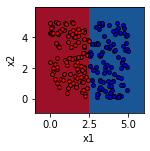

In [23]:
# Parameters
n_classes = 2
plot_colors = "rb"
plot_step = 0.02

ax = plt.subplot(2, 3, 1)

plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
DecisionBoundaryDisplay.from_estimator(
    classifier,
    x_train,
    cmap=plt.cm.RdBu,
    response_method="predict",
    ax=ax,
    xlabel='x1',
    ylabel='x2')

classes = [0, 1]
# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y_train == classes[i])
    plt.scatter(
        x_train[idx, 0],
        x_train[idx, 1],
        c=color,
        cmap=plt.cm.RdYlBu,
        edgecolor="black",
        s=15,
    )

In [24]:
# rotating by 45 degree clockwise
import math

rot_mat = (1/math.sqrt(2)) * (np.array([[1, 1], [1, -1]]))
for i in range(0, 200):
  x_train[i] = np.matmul(x_train[i], rot_mat)

In [25]:
# creating decision tree classifier and training it
classifier = DTC(max_depth=2)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

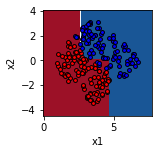

In [26]:
# Parameters
n_classes = 2
plot_colors = "rb"
plot_step = 0.02

ax = plt.subplot(2, 3, 1)

plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
DecisionBoundaryDisplay.from_estimator(
    classifier,
    x_train,
    cmap=plt.cm.RdBu,
    response_method="predict",
    ax=ax,
    xlabel='x1',
    ylabel='x2')

classes = [0, 1]
# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y_train == classes[i])
    plt.scatter(
        x_train[idx, 0],
        x_train[idx, 1],
        c=color,
        cmap=plt.cm.RdYlBu,
        edgecolor="black",
        s=15,
    )

## ***REGRESSION***

*Using the provided [dataset](https://drive.google.com/file/d/1g97xCqDpeTA4HNf65UI3Uik3K_99iYpA/view).*

---



In [27]:
# importing iris dataset from google drive
data = pd.read_csv("drive/MyDrive/PRML/Lab 2/task.csv")
print(data)
data = pd.DataFrame.to_numpy(data)  # converting data to numpy framework
# print(data)

            X         Y
0    0.374540 -0.005042
1    0.950714  0.835799
2    0.731994  0.244592
3    0.598658 -0.032501
4    0.156019  0.659870
..        ...       ...
195  0.349210 -0.049795
196  0.725956  0.132379
197  0.897110  0.609442
198  0.887086  0.630434
199  0.779876  0.460857

[200 rows x 2 columns]


In [28]:
x_train, y_train = data[:, 0], data[:, 1]

x_train = x_train.reshape(-1, 1)

In [29]:
from sklearn.tree import DecisionTreeRegressor as DTR

In [30]:
# creating decision tree classifier and training it
rgs_2 = DTR(max_depth=2)
rgs_2.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2)

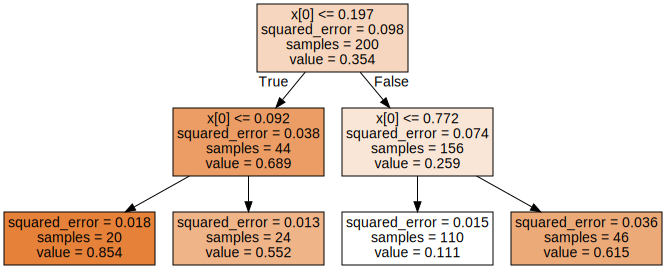

In [31]:
import graphviz
dot_data = tree.export_graphviz(rgs_2, out_file=None,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [32]:
# creating decision tree classifier and training it
rgs_3 = DTR(max_depth=3)
rgs_3.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

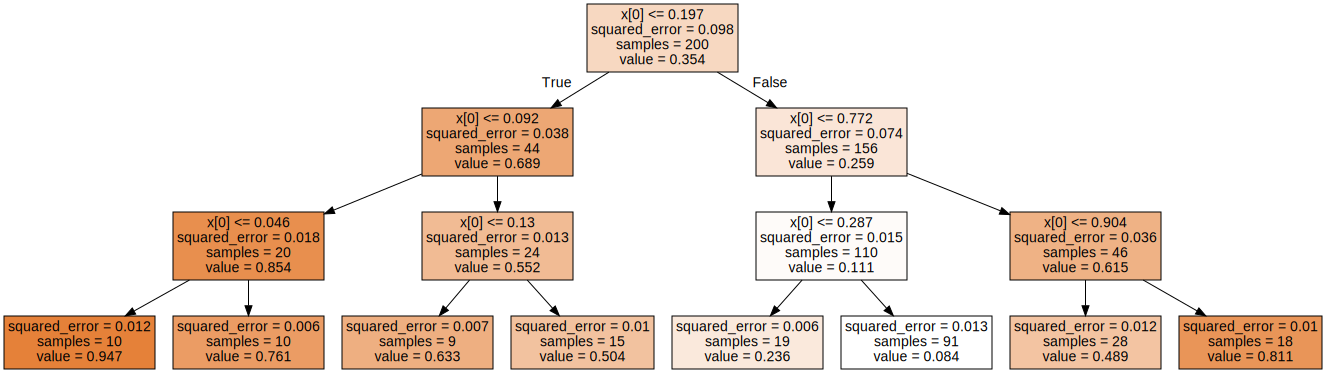

In [33]:
import graphviz
dot_data = tree.export_graphviz(rgs_3, out_file=None,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

# ***QUESTION 3***

*Implement decision tree on the given [dataset](https://drive.google.com/file/d/1vQq0MLt7GEcO7QG_xHuwSChvtxysgTVi/view?usp=share_link)*

---



In [51]:
import pandas as pd
import numpy as np

In [52]:
data_p = pd.read_csv('/content/drive/MyDrive/PRML/Lab 2/penguin.csv')

columns = data_p.columns.values.tolist()

In [53]:
data_p

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [54]:
columns

['species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex']

### ***1. Perform pre-processing and visualization of the dataset. Perform categorical encoding wherever applicable and split the data into train and test sets.***

**Pre-processing.**

In [55]:
print(data_p.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None


In [56]:
# to count and print number of NaN values in each column
data_p.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Theere are **two** values missing in each **bill_length_mm, bill_depth_mm, flipper_length_mm** and **body_mass_g.** As all the four columns are continuous distributions, we can replace the null values with average value of the feature.

The column **sex** have 11 missing values which can be replaced by the mode of the feature or can be left to none.

In [57]:
# Replacing NaN in 'bill_length_mm, bill_depth_mm, flipper_length_mm and body_mass_g' with mean
bl_mean = int(data_p['bill_length_mm'].mean())
print("Mean Bill Length (in mm) is:", bl_mean)
data_p['bill_length_mm'] = data_p['bill_length_mm'].fillna(bl_mean)


bd_mean = int(data_p['bill_depth_mm'].mean())
print("Mean Bill Depth (in mm) is:", bd_mean)
data_p['bill_depth_mm'] = data_p['bill_depth_mm'].fillna(bd_mean)


fl_mean = int(data_p['flipper_length_mm'].mean())
print("Mean Flipper Length (in mm) is:", fl_mean)
data_p['flipper_length_mm'] = data_p['flipper_length_mm'].fillna(fl_mean)


bm_mean = int(data_p['body_mass_g'].mean())
print("Mean Body Mass (in g) is:", bm_mean)
data_p['body_mass_g'] = data_p['body_mass_g'].fillna(bm_mean)


# Replacing NaN in 'Sex' with mode
sex_mode = (data_p['sex'].mode())[0]
print("Mode of sex is:", sex_mode)
data_p['sex'] = data_p['sex'].fillna(sex_mode)

Mean Bill Length (in mm) is: 43
Mean Bill Depth (in mm) is: 17
Mean Flipper Length (in mm) is: 200
Mean Body Mass (in g) is: 4201
Mode of sex is: MALE


In [58]:
# Verifying that no column contains NaN values now
data_p.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [59]:
data_p['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

*Converting labels in feature column 'sex' with 0 for male and 1 for female. And coverting labels in feature column 'island' with 0 for 'Torgersen', 1 for 'Biscoe' and 2 for 'Dream'*

In [60]:
col_sex = data_p['sex']
for i in range(0, len(col_sex)):
  if col_sex[i] == "MALE":
    col_sex[i] = 0
  else:
    col_sex[i] = 1
data_p['sex']

<ipython-input-60-4bc7183a6546>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col_sex[i] = 0
<ipython-input-60-4bc7183a6546>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col_sex[i] = 1


0      0
1      1
2      1
3      0
4      1
      ..
339    0
340    1
341    0
342    1
343    0
Name: sex, Length: 344, dtype: object

In [61]:
col_emb = data_p['island']
for i in range(0, len(col_emb)):
  if col_emb[i] == "Torgersen":
    col_emb[i] = 0
  elif col_emb[i] == "Biscoe":
    col_emb[i] = 1
  else:
    col_emb[i] = 2
data_p['island']

<ipython-input-61-9e3dced240f4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col_emb[i] = 0
<ipython-input-61-9e3dced240f4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col_emb[i] = 1
<ipython-input-61-9e3dced240f4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col_emb[i] = 2


0      0
1      0
2      0
3      0
4      0
      ..
339    1
340    1
341    1
342    1
343    1
Name: island, Length: 344, dtype: object

Splitting Dataset

In [62]:
datap_np = pd.DataFrame.to_numpy(data_p)

x = datap_np[:, 1:]
y = datap_np[:, 0]


from sklearn.model_selection import train_test_split as split
x_train, x_test, y_train, y_test = split(x, y, train_size=0.8)

### ***2. Implement the cost function as per your roll num (B21CS073 - Gini Index).***

In [63]:
def gini_index(feature, label):
    classes = np.unique(label)
    gini = 1

    for cls in classes:
        p_cls = len([i for i in range(len(feature)) if feature[i]==cls])/len(feature)
        gini = gini - p_cls**2

    return gini

### ***3. In order for the decision tree to work successfully, continuous variables need to be converted to categorical variables first. To do this, you need to implement a decision function that makes this split. Let us call that cont_to_cat().***

*The details of the function are the following-*
*a. Assume that the continuous variables are independent of each other i.e. assuming 2 continuous variables A and B, the split of A does not in any way affect the split you will perform in B.*

*b. The continuous variables should only be split into 2 categories, and the optimal split is one that divides the samples the best, based on the value of the function you have been allotted (Gini Index).*

In [64]:
def cont_to_cat(feature, label):
    gini_max = 1
    thres = None
    left = None
    right = None

    for threshold in feature:
        left = [i for i in feature if i<threshold]
        label_lft = [label[i] for i in range(len(feature)) if feature[i]<threshold]
        left_ind = [i for i in range(len(feature)) if feature[i]<threshold]

        right = [i for i in feature if i>=threshold]
        label_rgt = [label[i] for i in range(len(feature)) if feature[i]>=threshold]
        right_ind = [i for i in range(len(feature)) if feature[i]>=threshold]

        p_left = len(left)/len(feature)
        p_right = len(right)/len(feature)

        gini_left = gini_index(left, label_lft)
        gini_right = gini_index(right, label_rgt)

        gini = gini_left*p_left + gini_right*p_right
        
        if gini<gini_max:
            gini_max = gini
            thres = threshold

    return (gini, left_ind, right_ind, threshold)

### ***Decision Tree Class***

4. After step 2, all the attributes would have categorical values, so now you can go ahead and implement the training function. This would include implementing the following helper functions: 
a. Get the attribute that leads to the best split
b. Make that split
c. Repeat these steps for the newly-created split

5. The DT should also include the following properties in the train function
a. There should be a max depth that should be defined i.e. a depth after which the tree shouldn’t be allowed to grow [5 marks]
b. The algorithm should self-identify when there is no information gain being done, i.e. the model has plateaued in it’s training and shouldn’t grow further. 

6. Write a function which is responsible for classification (i.e. at test time).

7. Find out the accuracy you get on the test data (overall and class-wise).

In [65]:
class Node():
    def __init__(self, gini=None , threshold=None , left=None , right=None, feature=None ,value=None):
        self.gini=gini
        self.threshold=threshold
        self.left=left
        self.right=right
        self.feature=feature
        self.value=value


class Decision_Tree_Classifier():
    def __init__(self, max_depth=2):
        self.max_depth=max_depth
        self.root= None

    def __best_split(self, x_train, y_train):
        gini = 1
        split_info = False

        for i in range(len(x_train[0])):
            gini_info = cont_to_cat(x_train[:, i], y_train)
            gini_feat = gini_info[0]

            if gini_feat<gini:
                gini = gini_feat

                left = np.array([np.concatenate((x_train[i], y_train[i]), axis=1) for i in gini_info[1]])
                right = np.array([np.concatenate((x_train[i], y_train[i]), axis=1) for i in gini_info[2]])

                split_info = {'gini': gini_feat, 'threshold': gini_info[3], 'left': left, 'right': right, 'feature':i}

        return split_info
        

    def tree(self, x_train, y_train, curr_depth=0):
        n_data = len(x_train)
        n_features = len(x_train[0])

        if curr_depth<=self.max_depth :
            if  n_data > 1:
                split_info = self.__best_split(x_train, y_train)

                if split_info:
                    left_tree = self.tree(split_info['left'], curr_depth+1)
                    right_tree = self.tree(split_info['right'], curr_depth+1)

                    return Node(split_info['gini'], split_info['threshold'], left_tree, right_tree, split_info['feature'])

        count=0
        y_=list(y_train)
        pred_value= y_[0]
        for i in y_:
            curr_freq= y_.count(i)
            if curr_freq>count:
                count=curr_freq
                pred_value=i
        return Node(value= pred_value) 

    def __predictor(self, x, tree):
        if tree.value!=None:
            return tree.value
            
        feature = x[tree.feature] 
        if feature<tree.threshold:
            return self.__predictor(x, tree.left)
        else:
            return self.__predictor(x, tree.right)

    def fit(self, x_train, y_train):
        self.root= self.tree(x_train, y_train)

    def predict(self, x_test):
        y = []

        for x in x_test:
            y_pred = self.__predictor(x, self.root)
            y.append(y_pred)

        return y



    

In [66]:
from sklearn.metrics import accuracy_score

classifier = Decision_Tree_Classifier(max_depth=2)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
print(accuracy_score(y_pred, y_test))

0.4492753623188406
